In [ ]:
# download and unzip with Colab
!wget -O database.zip https://humanheart-project.creatis.insa-lyon.fr/database/api/v1/collection/637218c173e9f0047faa00fb/download
!unzip database.zip

--2023-12-10 20:18:48--  https://humanheart-project.creatis.insa-lyon.fr/database/api/v1/collection/637218c173e9f0047faa00fb/download
Resolving humanheart-project.creatis.insa-lyon.fr (humanheart-project.creatis.insa-lyon.fr)... 195.220.108.28
Connecting to humanheart-project.creatis.insa-lyon.fr (humanheart-project.creatis.insa-lyon.fr)|195.220.108.28|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘database.zip’

database.zip            [        <=>         ]   2.28G  21.5MB/s    in 1m 53s  

2023-12-10 20:20:41 (20.8 MB/s) - ‘database.zip’ saved [2452589021]

Archive:  database.zip
replace ACDC/database/training/patient015/MANDATORY_CITATION.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
!pip install pytorch_lightning
!pip install torchmetrics

In [3]:
# test code for .py
#!python download.py

In [75]:
# Test code for loading one file from .nii to numpy array

import nibabel as nib
import numpy as np
from scipy.ndimage import affine_transform

# Specify the path to the input .nii.gz file
input_nii_gz_file = 'ACDC/database/training/patient096/patient096_frame08.nii.gz'
input_nii_gt_file = 'ACDC/database/training/patient096/patient096_frame08_gt.nii.gz'

# Load the NIfTI fil
nifti_image = nib.load(input_nii_gz_file)
nifti_image_gt = nib.load(input_nii_gt_file)

# Access the data and header information
nifti_data = nifti_image.get_fdata()
header = nifti_image.header
nifti_data_gt = nifti_image_gt.get_fdata()
header_gt = nifti_image_gt.header

# Access the shape of the data (dimensions) like this:
data_shape = nifti_data.shape

# Access the header information, such as the voxel sizes:
voxel_sizes = header.get_zooms()

affine_matrix = nifti_image.affine
inverse_affine = np.linalg.inv(affine_matrix)
inverse_affine_short = inverse_affine[:3,:3]
scaled_data = affine_transform(nifti_data, inverse_affine_short, output_shape=(216, 304, 8))

## Print some information for demonstration
#print(f"Data Shape: {data_shape}")
#print(f"Voxel Sizes: {voxel_sizes}")
#
#print(f"affine shape: {affine_matrix.shape}")
#print(f"affine: {affine_matrix}")
#
#
#print(f"Inverse affine shape: {inverse_affine.shape}")
#print(f"Inverse affine: {inverse_affine}")
#
#print(f"Scled data shape: {scaled_data.shape}")
#print(f"Scled data: {scaled_data}")
#
#print(f"Data shape: {nifti_data.shape}")
#print(f"Data: {nifti_data}")


Text(0.5, 0.98, 'Center slices for EPI image')

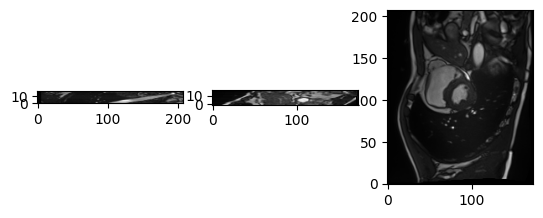

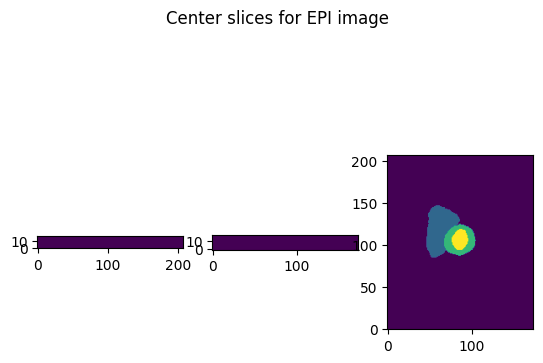

In [76]:
# Test code for data exploration, visualization

import matplotlib.pyplot as plt

def show_slices(slices,cmap):
   #Function to display row of image slices
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap=cmap, origin="lower")

slice_0 = nifti_data[110, :, :]
slice_1 = nifti_data[:, 150, :]
slice_2 = nifti_data[:, :, 6]
slice_0_gt = nifti_data_gt[110, :, :]
slice_1_gt = nifti_data_gt[:, 150, :]
slice_2_gt = nifti_data_gt[:, :, 4]
show_slices([slice_0, slice_1, slice_2],"gray")
show_slices([slice_0_gt, slice_1_gt, slice_2_gt],"viridis")
plt.suptitle("Center slices for EPI image")

In [77]:
# Go through every folder and save the files into input-output numpy arrays

import os
import numpy as np
import nibabel as nib
from scipy.ndimage import affine_transform
from sklearn.model_selection import train_test_split

# Specify the path to the main folder containing 'test' and 'train' subfolders.
main_folder = 'ACDC/database'

# Initialize empty lists to store the data
input = []
output = []

#Function to load nifti image
def load_images(file_path):
  img = nib.load(file_path).get_fdata()
  return img

# Function to check if a file should be ignored
def should_ignore(file_name):
    return file_name == 'MANDATORY_CITATION.md'

# Iterate through 'test' and 'train' folders
for folder_name in ['testing', 'training']:
    if not should_ignore(folder_name):
      folder_path = os.path.join(main_folder, folder_name)
      patient_folders = os.listdir(folder_path)

      # Iterate through patient folders
      for patient_folder in patient_folders:
        if not should_ignore(patient_folder):
          patient_path = os.path.join(folder_path, patient_folder)
          files = os.listdir(patient_path)

          # Iterate through files in each patient folder
          for file_name in files:
            file_path = os.path.join(patient_path, file_name)

            if file_name.endswith('.nii.gz') & ('4d' not in file_name):
              #Separate the gt and non-gt files
              if 'gt' in file_name:
                gt_img = load_images(file_path)
                output.append([folder_name, gt_img])
              else:
                img = load_images(file_path)
                input.append([folder_name, img])

input_array = np.array(input)
output_array = np.array(output)

<ipython-input-77-88a13b6a0418>:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  input_array = np.array(input)
<ipython-input-77-88a13b6a0418>:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  output_array = np.array(output)


In [7]:
#import os
#import numpy as np
#import nibabel as nib
#from scipy.ndimage import affine_transform
#from sklearn.model_selection import train_test_split

In [8]:
#def load_images(file_path):
#    img = nib.load(file_path).get_fdata()
#    return img

In [9]:
#input = []
#output = []
#
#file_paths = []
#file_paths.append("ACDC/database/training/patient025/patient025_frame01.nii.gz")
#file_paths.append("ACDC/database/training/patient001/patient001_frame01.nii.gz")
#file_paths.append("ACDC/database/training/patient057/patient057_frame01.nii.gz")
#file_paths.append("ACDC/database/training/patient034/patient034_frame16.nii.gz")
#file_paths.append("ACDC/database/training/patient048/patient048_frame08.nii.gz")
#file_paths.append("ACDC/database/training/patient039/patient039_frame01.nii.gz")
#file_paths.append("ACDC/database/training/patient050/patient050_frame12.nii.gz")
#file_paths.append("ACDC/database/training/patient096/patient096_frame08.nii.gz")
#
#file_paths.append("ACDC/database/training/patient025/patient025_frame01_gt.nii.gz")
#file_paths.append("ACDC/database/training/patient001/patient001_frame01_gt.nii.gz")
#file_paths.append("ACDC/database/training/patient057/patient057_frame01_gt.nii.gz")
#file_paths.append("ACDC/database/training/patient034/patient034_frame16_gt.nii.gz")
#file_paths.append("ACDC/database/training/patient048/patient048_frame08_gt.nii.gz")
#file_paths.append("ACDC/database/training/patient039/patient039_frame01_gt.nii.gz")
#file_paths.append("ACDC/database/training/patient050/patient050_frame12_gt.nii.gz")
#file_paths.append("ACDC/database/training/patient096/patient096_frame08_gt.nii.gz")
#
#folder_name = 'training'
#for file_path in file_paths:
#    file_name = file_path.split('/')[-1]
#
#    if 'gt' in file_name:
#        gt_img = load_images(file_path)
#        output.append([folder_name, gt_img])
#    else:
#        img = load_images(file_path)
#        input.append([folder_name, img])
#
#folder_name = 'testing'
#for i in range(len(input)):
#    img = input[i][1]
#    gt_img = output[i][1]
#    input.append([folder_name, img])
#    output.append([folder_name, gt_img])
#
#input_array = np.array(input)
#output_array = np.array(output)

In [10]:
print(input_array.shape)

(300, 2)


In [11]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiofiles                         23.2.1
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.13.1
backcall                         0.2.0
ba

In [12]:
print(f"input shape: {input_array.shape}")
print(f"output shape: {output_array.shape}")
print(f"input folders: {input_array[:10,0]}")
print(f"input data: {input_array[:3,1]}")
print(f"output data: {output_array[:3,1]}")

input shape: (300, 2)
output shape: (300, 2)
input folders: ['testing' 'testing' 'testing' 'testing' 'testing' 'testing' 'testing'
 'testing' 'testing' 'testing']
input data: [array([[[10., 14., 16., ..., 18., 19., 17.],
         [10., 14., 16., ..., 18., 19., 17.],
         [10., 14., 16., ..., 18., 19., 17.],
         ...,
         [10., 14., 16., ..., 18., 19., 17.],
         [10., 14., 16., ..., 18., 19., 17.],
         [10., 14., 16., ..., 18., 19., 17.]],

        [[10., 14., 16., ..., 18., 19., 17.],
         [10., 14., 16., ..., 18., 19., 17.],
         [10., 14., 16., ..., 18., 19., 17.],
         ...,
         [10., 14., 16., ..., 18., 19., 17.],
         [10., 14., 16., ..., 18., 19., 17.],
         [10., 14., 16., ..., 18., 19., 17.]],

        [[10., 14., 16., ..., 18., 19., 17.],
         [10., 14., 16., ..., 18., 19., 17.],
         [10., 14., 16., ..., 18., 19., 17.],
         ...,
         [10., 14., 16., ..., 18., 19., 17.],
         [10., 14., 16., ..., 18., 19., 17.

In [78]:
from sklearn.model_selection import train_test_split

print(f"Input array shape: {input_array.shape}")

input_train = input_array[np.where(input_array[:, 0] == 'training')]
output_train = output_array[np.where(output_array[:, 0] == 'training')]

print(f"Input train shape: {input_train.shape}")
print(f"Output train shape: {output_train.shape}")

input_test = input_array[np.where(input_array[:, 0] == 'testing')]
output_test = output_array[np.where(output_array[:, 0] == 'testing')]
input_val, input_test, output_val, output_test = train_test_split(input_test, output_test, train_size = 0.6, shuffle = False)

print(f"Input validation shape: {input_val.shape}")
print(f"Output validation shape: {output_val.shape}")
print(f"Input test shape: {input_test.shape}")
print(f"Output test shape: {output_test.shape}")

Input array shape: (300, 2)
Input train shape: (200, 2)
Output train shape: (200, 2)
Input validation shape: (60, 2)
Output validation shape: (60, 2)
Input test shape: (40, 2)
Output test shape: (40, 2)


In [79]:
# NEW PADDING


import numpy as np

# Find the largest shape among all the arrays
largest_input_shape = np.max([arr.shape for _, arr in input_array], axis=0)
largest_output_shape = np.max([arr.shape for _, arr in output_array], axis=0)
print(largest_input_shape, largest_output_shape)

# Function to pad and process a batch of arrays
def process_batch(array, largest_shape, batch_size):
    padded_arrays = []
    for i in range(0, len(array), batch_size):
        batch = array[i:i + batch_size]
        batch_padded = []
        for name, arr in batch:
            max_shape = np.maximum(largest_shape, arr.shape)
            pad_width = [(0, max_dim - curr_dim) for max_dim, curr_dim in zip(max_shape, arr.shape)]
            padded_arr = np.pad(arr, pad_width, mode='constant')
            batch_padded.append((name, padded_arr))
        padded_arrays.extend(batch_padded)
    return padded_arrays

[428 512  21] [428 512  21]


In [15]:
input_array.shape

(300, 2)

In [16]:
input_array[0,1].shape

(232, 256, 10)

In [80]:
import numpy as np

# Assuming input_array has text in the first column and 3D images in the second column
# Function to slice 3D images along the third axis and create 2D images
def slice_3d_images(input_array,wantToStandardize):
    sliced_images = []
    for text, image_3d in input_array:
        #for i in range(image_3d.shape[2]):
        for i in range(1):
            image_2d = image_3d[:, :, 4].astype('float16')
            if wantToStandardize:
                max_2d = np.max(image_2d)
                image_2d = image_2d/max_2d
            sliced_images.append(image_2d)
    return np.array(sliced_images)


In [81]:
# Slice 3D images to get 2D images
sliced_input_train = slice_3d_images(input_train,wantToStandardize=True)
sliced_input_val = slice_3d_images(input_val,wantToStandardize=True)
sliced_input_test = slice_3d_images(input_test,wantToStandardize=True)

sliced_output_train = slice_3d_images(output_train,wantToStandardize=False)
sliced_output_val = slice_3d_images(output_val,wantToStandardize=False)
sliced_output_test = slice_3d_images(output_test,wantToStandardize=False)

print(sliced_input_train.shape)
print(sliced_input_val.shape)
print(sliced_input_test.shape)
print(sliced_output_train.shape)
print(sliced_output_val.shape)
print(sliced_output_test.shape)
print(sliced_input_train[0].dtype)

<ipython-input-80-3ffa7485473f>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(sliced_images)


(200,)
(60,)
(40,)
(200,)
(60,)
(40,)
float16


In [82]:
sliced_input_train = sliced_input_train[:8]#[:100]
sliced_output_train = sliced_output_train[:8]#[:100]
sliced_input_val = sliced_input_val[:8]#[:40]
sliced_output_val = sliced_output_val[:8]#[:40]
sliced_input_test = sliced_input_test[:8]#[:40]
sliced_output_test = sliced_output_test[:8]#[:40]

# Padding

In [83]:
sliced_inputs_all = np.concatenate((sliced_input_train, sliced_input_val, sliced_input_test))
print(f"sliced_inputs_all shape: {sliced_inputs_all.shape}")

sliced_inputs_all shape: (24,)


In [84]:
max_width = max(image.shape[1] for image in sliced_inputs_all)
max_height = max(image.shape[0] for image in sliced_inputs_all)

print(f"Max width: {max_width}, Max height: {max_height}")

Max width: 256, Max height: 256


In [85]:
# Round up the maximum height to be divisible by 32
# Maximum width is already dividsible by 32
padded_height = ((max_height - 1) // 32 + 1) * 32
print(f"Padded height (to be divisible by 32): {padded_height}")

Padded height (to be divisible by 32): 256


In [86]:
# Pad each 2D image to match the maximum width and height
padded_inputs = []
for image in sliced_input_train:
    pad_width = ((0, padded_height - image.shape[0]), (0, max_width - image.shape[1]))
    padded_image = np.pad(image, pad_width, mode='constant')
    padded_inputs.append(padded_image)

# Convert the list of padded images to a NumPy array
padded_input_train = np.array(padded_inputs)

# Now padded_images_array contains all the 2D images padded to the desired dimensions
print(padded_input_train.shape)  # The shape will be (total_2d_images, padded_height, padded_width)

(8, 256, 256)


In [87]:
# Pad each 2D image to match the maximum width and height
padded_inputs = []
for image in sliced_output_train:
    pad_width = ((0, padded_height - image.shape[0]), (0, max_width - image.shape[1]))
    padded_image = np.pad(image, pad_width, mode='constant')
    padded_inputs.append(padded_image)

# Convert the list of padded images to a NumPy array
padded_output_train = np.array(padded_inputs)

# Now padded_images_array contains all the 2D images padded to the desired dimensions
print(padded_output_train.shape)

(8, 256, 256)


In [88]:
# Pad each 2D image to match the maximum width and height
padded_inputs = []
for image in sliced_input_val:
    pad_width = ((0, padded_height - image.shape[0]), (0, max_width - image.shape[1]))
    padded_image = np.pad(image, pad_width, mode='constant')
    padded_inputs.append(padded_image)

# Convert the list of padded images to a NumPy array
padded_input_val = np.array(padded_inputs)

# Now padded_images_array contains all the 2D images padded to the desired dimensions
print(padded_input_val.shape)

(8, 256, 256)


In [89]:
# Pad each 2D image to match the maximum width and height
padded_inputs = []
for image in sliced_output_val:
    pad_width = ((0, padded_height - image.shape[0]), (0, max_width - image.shape[1]))
    padded_image = np.pad(image, pad_width, mode='constant')
    padded_inputs.append(padded_image)

# Convert the list of padded images to a NumPy array
padded_output_val = np.array(padded_inputs)

# Now padded_images_array contains all the 2D images padded to the desired dimensions
print(padded_output_val.shape)

(8, 256, 256)


In [90]:
# Pad each 2D image to match the maximum width and height
padded_inputs = []
for image in sliced_input_test:
    pad_width = ((0, padded_height - image.shape[0]), (0, max_width - image.shape[1]))
    padded_image = np.pad(image, pad_width, mode='constant')
    padded_inputs.append(padded_image)

# Convert the list of padded images to a NumPy array
padded_input_test = np.array(padded_inputs)

# Now padded_images_array contains all the 2D images padded to the desired dimensions
print(padded_input_test.shape)

(8, 256, 256)


In [91]:
# Pad each 2D image to match the maximum width and height
padded_inputs = []
for image in sliced_output_test:
    pad_width = ((0, padded_height - image.shape[0]), (0, max_width - image.shape[1]))
    padded_image = np.pad(image, pad_width, mode='constant')
    padded_inputs.append(padded_image)

# Convert the list of padded images to a NumPy array
padded_output_test = np.array(padded_inputs)

# Now padded_images_array contains all the 2D images padded to the desired dimensions
print(padded_output_test.shape)

(8, 256, 256)


In [29]:
# Set your batch size
# batch_size = 10

# padded_input_train = []
# padded_input_val = []
# padded_input_test = []
# padded_output_train = []
# padded_output_val = []
# padded_output_test = []

# i = 0
# for j in range(20, len(input_train) + 1, 20):
#   print("Started")
#   # Convert the list of lists to a NumPy array
#   padded_input_train.append(process_batch(input_train[i:j, :], largest_input_shape, batch_size))
#   i = j
#   print(f"input_train length: {j}")

# i = 0
# for j in range(20, len(input_val) + 1, 20):
#   print("Started")
#   # Convert the list of lists to a NumPy array
#   padded_input_val.append(process_batch(input_val[i:j, :], largest_input_shape, batch_size))
#   i = j
#   print(f"input_val length: {j}")

# i = 0
# for j in range(20, len(input_test) + 1, 20):
#   print("Started")
#   # Convert the list of lists to a NumPy array
#   padded_input_test.append(process_batch(input_test[i:j, :], largest_input_shape, batch_size))
#   i = j
#   print(f"input_test length: {j}")


# i = 0
# for j in range(20, len(output_train) + 1, 20):
#   print("Started")
#   # Convert the list of lists to a NumPy array
#   padded_output_train.append(process_batch(output_train[i:j, :], largest_input_shape, batch_size))
#   i = j
#   print(f"output_train length: {j}")

# i = 0
# for j in range(20, len(output_val) + 1, 20):
#   print("Started")
#   # Convert the list of lists to a NumPy array
#   padded_output_val.append(process_batch(output_val[i:j, :], largest_input_shape, batch_size))
#   i = j
#   print(f"output_val length: {j}")

# i = 0
# for j in range(20, len(output_test) + 1, 20):
#   print("Started")
#   # Convert the list of lists to a NumPy array
#   padded_output_test.append(process_batch(output_test[i:j, :], largest_input_shape, batch_size))
#   i = j
#   print(f"output_test length: {j}")

In [30]:
# Set your batch size
# batch_size = 2

# # padded_inputs = process_batch(input_array[:60,:], largest_input_shape, batch_size)

# padded_inputs = []
# i = 0
# for j in range(50,300,50): # CHANGE 300 TO 301 IF NOT RUN IN COLAB!!!!!!!!!!!!
#   # Convert the list of lists to a NumPy array
#   padded_inputs.append(process_batch(input_array[i:j, :], largest_input_shape, batch_size))
#   i = j
#   print(f"Input length: {j}")


# padded_outputs = []
# i = 0
# for j in range(50,300,50): # CHANGE 300 TO 301 IF NOT RUN IN COLAB!!!!!!!!!!!!
#   # Convert the list of lists to a NumPy array
#   padded_outputs.append(process_batch(output_array[i:j, :], largest_output_shape, batch_size))
#   i = j
#   print(f"Output length: {j}")


# Convert the list of lists to a NumPy array
# padded_inputs_test = np.array([item[1] for item in padded_inputs_test])

"""
# Process the input data in smaller steps
padded_inputs = process_batch(input_array, largest_input_shape, batch_size)

# Process the output data in smaller steps
padded_outputs = process_batch(output_array, largest_output_shape, batch_size)
"""

'\n# Process the input data in smaller steps\npadded_inputs = process_batch(input_array, largest_input_shape, batch_size)\n\n# Process the output data in smaller steps\npadded_outputs = process_batch(output_array, largest_output_shape, batch_size)\n'

In [31]:
# from itertools import chain

# def flatten_chain(matrix):
#   return list(chain.from_iterable(matrix))

# padded_inputs = np.array(flatten_chain(padded_inputs))
# padded_outputs = np.array(flatten_chain(padded_outputs))

In [32]:
# for item in padded_inputs:
#   print(item)
#   print(len(item))

# print(padded_inputs)

In [33]:
# print(len(padded_inputs))
# print(padded_inputs[0][1])

In [34]:
# for i, data in enumerate(padded_inputs):
#   # for j, data2 in enumerate(data):
#      print(f"Image {i + 1} shape: {data[1].shape}")

In [35]:
#Separate the inputs and outputs into train-test-val arrays

"""
from sklearn.model_selection import train_test_split

print(f"Input array shape: {padded_inputs.shape}")

input_train = padded_inputs[np.where(padded_inputs[:, 0] == 'training')]
output_train = padded_outputs[np.where(padded_outputs[:, 0] == 'training')]

print(f"Input train shape: {input_train.shape}")
print(f"Output train shape: {output_train.shape}")

input_test = padded_inputs[np.where(padded_inputs[:, 0] == 'testing')]
output_test = padded_outputs[np.where(padded_outputs[:, 0] == 'testing')]
input_val, input_test, output_val, output_test = train_test_split(input_test, output_test, train_size = 0.6, shuffle = False)

print(f"Input validation shape: {input_val.shape}")
print(f"Output validation shape: {output_val.shape}")
print(f"Input test shape: {input_test.shape}")
print(f"Output test shape: {output_test.shape}")
"""

'\nfrom sklearn.model_selection import train_test_split\n\nprint(f"Input array shape: {padded_inputs.shape}")\n\ninput_train = padded_inputs[np.where(padded_inputs[:, 0] == \'training\')]\noutput_train = padded_outputs[np.where(padded_outputs[:, 0] == \'training\')]\n\nprint(f"Input train shape: {input_train.shape}")\nprint(f"Output train shape: {output_train.shape}")\n\ninput_test = padded_inputs[np.where(padded_inputs[:, 0] == \'testing\')]\noutput_test = padded_outputs[np.where(padded_outputs[:, 0] == \'testing\')]\ninput_val, input_test, output_val, output_test = train_test_split(input_test, output_test, train_size = 0.6, shuffle = False)\n\nprint(f"Input validation shape: {input_val.shape}")\nprint(f"Output validation shape: {output_val.shape}")\nprint(f"Input test shape: {input_test.shape}")\nprint(f"Output test shape: {output_test.shape}")\n'

In [36]:
# Find the largest shape among all the arrays
largest_input_shape = np.max([arr.shape for _, arr in input_array], axis=0)
largest_output_shape = np.max([arr.shape for _, arr in output_array], axis=0)

print(largest_input_shape, largest_output_shape)

[428 512  21] [428 512  21]


In [37]:
# Find the smallest shape among all the arrays
smallest_input_shape = np.min([arr.shape for _, arr in input_array], axis=0)
smallest_output_shape = np.min([arr.shape for _, arr in output_array], axis=0)

print(smallest_input_shape, smallest_output_shape)

[154 154   6] [154 154   6]


In [38]:
train_dataset = np.stack((padded_input_train, padded_output_train), axis=0)
val_dataset = np.stack((padded_input_val, padded_output_val), axis=0)
test_dataset = np.stack((padded_input_test, padded_output_test), axis=0)

print(train_dataset.shape)
print(val_dataset.shape)
print(test_dataset.shape)

(2, 8, 256, 256)
(2, 8, 256, 256)
(2, 8, 256, 256)


In [39]:
# Freeing up some memory
del padded_input_train
del padded_input_val
del padded_input_test
del padded_output_train
del padded_output_val
del padded_output_test

del sliced_input_train
del sliced_input_val
del sliced_input_test
del sliced_output_train
del sliced_output_val
del sliced_output_test

In [40]:
del input_train
del input_val
del input_test
del output_train
del output_val
del output_test
del input_array
del output_array
del input
del output

In [41]:
import gc
gc.collect()

7572

In [42]:
print(type(train_dataset))

<class 'numpy.ndarray'>


In [43]:
# train_dataset = torch.tensor(train_dataset)
# val_dataset = torch.tensor(val_dataset)
# test_dataset = torch.tensor(test_dataset)

# print(train_dataset.shape)
# print(val_dataset.shape)
# print(test_dataset.shape)

In [44]:
# for image in train_dataset[:,0]:
#   print(image)

In [45]:
import torch
import pytorch_lightning as pl
import torchvision
from torchvision import transforms
import torchmetrics
from PIL import Image

# Hyperparameters

In [46]:
padding = 358
#max_height = 442   Sztem 448, mert nem osztható 32-vel
max_height = 448
max_width = 512

resolution = 112
num_classes = 4
num_features = 8

batch_size = 8
num_workers = 2
num_epochs = 10
learning_rate = 0.001
weight_decay = 1e-4
width = 64

# Data Module

In [47]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import pytorch_lightning as pl

class ImageDataset(Dataset):
    def __init__(self, data_array, transform=None):
        self.data_array = data_array
        self.transform = transform

    def __len__(self):
        return self.data_array.shape[1]

    def __getitem__(self, index):
        image = self.data_array[0, index]
        label = self.data_array[1, index]

        if self.transform:
            image = self.transform(image)
            label = self.transform(label)

        return {"image": image, "label": label}

class MyDataModule(pl.LightningDataModule):
    def __init__(self, train_dataset, val_dataset, test_dataset, batch_size, max_height, max_width):
        super().__init__()
        self.train_dataset, self.val_dataset, self.test_dataset = train_dataset, val_dataset, test_dataset
        self.batch_size = batch_size
        self.max_height, self.max_width = max_height, max_width

    def setup(self, stage=None):
      self.train_dataset = torch.tensor(self.train_dataset)
      self.val_dataset = torch.tensor(self.val_dataset)
      self.test_dataset = torch.tensor(self.test_dataset)

    def train_dataloader(self):
        return DataLoader(
            ImageDataset(self.train_dataset),
            batch_size=self.batch_size,
            num_workers=num_workers,
            pin_memory=True,
            drop_last=True,
            shuffle=True)

    def val_dataloader(self):
        return DataLoader(
            ImageDataset(self.val_dataset),
            batch_size=self.batch_size,
            num_workers=num_workers,
            pin_memory=True)

    def test_dataloader(self):
        return DataLoader(
            ImageDataset(self.test_dataset),
            batch_size=self.batch_size)

    def transfer_to_device(self, device):
        self.train_dataset.to(device)
        self.val_dataset.to(device)
        self.test_dataset.to(device)

In [48]:
datamodule = MyDataModule(train_dataset, val_dataset, test_dataset, batch_size=batch_size, max_height=max_height, max_width=max_width)
datamodule.prepare_data()
datamodule.setup()

In [49]:
# Access dataloaders
train_dataloader = datamodule.train_dataloader()
val_dataloader = datamodule.val_dataloader()
test_dataloader = datamodule.test_dataloader()

In [50]:
print(len(train_dataloader))
print(train_dataloader)

1


In [106]:
# Iterate over batches and perform training
for batch in test_dataloader:
    image, label = batch["image"].unsqueeze(1), batch["label"].unsqueeze(1)
    print("Image Batch shape after padding:", image.shape)
    print("Label Batch shape after padding:", label.shape)
    # print(len(batch["image"]))
    # for image in batch["image"]:
    #   print(image[0])

Image Batch shape after padding: torch.Size([8, 1, 256, 256])
Label Batch shape after padding: torch.Size([8, 1, 256, 256])


In [52]:
# def visualize_images(dataset, num_images, num_augmentations):
#     plt.figure(figsize=(num_augmentations * 2, num_images * 2))
#     for row in range(num_images):
#         for column in range(num_augmentations):
#             image = dataset[row][0][4]
#             label = dataset[row][1][4]
#             plt.subplot(num_images, num_augmentations, num_augmentations * row + column + 1)
#             plt.imshow(image)
#             plt.axis("off")
#     plt.tight_layout()
#     plt.show()

In [53]:
# visualize_images(datamodule.train_dataset, num_images=4, num_augmentations=5)

In [54]:
# Define device
#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = "cpu"

In [55]:
#def dice_loss(input, target, num_classes=4):
#    intersection = torch.sum((input == target) & (target > 0), dim=(2, 3))
#    union = torch.sum((input > 0).type(torch.DoubleTensor) + (target > 0).type(torch.DoubleTensor), dim=(2, 3))
#
#    print(intersection)
#    print(union)
#
#    dice = (2.0 * intersection) / (union)
#    dice_loss = 1.0 - dice.mean()
#
#    return dice_loss

In [56]:
!pip install torchmetrics

In [57]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

class Unet_ResNet(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        # rétegek
        self.enc1 = self.conv_block(1,64)
        self.enc2 = self.conv_block(64,128)
        self.enc3 = self.conv_block(128,256)
        self.enc4 = self.conv_block(256,512)

        self.conv = nn.Conv2d(1,3,kernel_size=1)
        self.resnet = torchvision.models.resnet50(pretrained=True)
        for param in self.resnet.parameters():
            param.requires_grad = False

        self.resnet_layer0 = nn.Sequential(
            self.resnet.conv1,
            self.resnet.bn1,
            self.resnet.relu
        )
        self.resnet_maxpool = self.resnet.maxpool
        self.resnet_layer1 = self.resnet.layer1
        self.resnet_layer2 = self.resnet.layer2
        self.resnet_layer3 = self.resnet.layer3
        self.resnet_layer4 = self.resnet.layer4


        self.middle = self.redim_block(2048,2048)

        self.red5 = self.redim_block(4096,2048)
        self.dec5 = self.upsample_block(2048,1024)
        self.red4 = self.redim_block(2048,1024)
        self.dec4 = self.upsample_block(1024,512)
        self.red3 = self.redim_block(1024,512)
        self.dec3 = self.upsample_block(512,256)
        self.red2 = self.redim_block(512,256)
        self.dec2 = self.upsample_block(256,64)
        self.red1 = self.redim_block(128,64)
        self.dec1 = self.upsample_block(64,num_features)


        #self.resnet_layer0.register_forward_hook(self.hook_fn)
        #self.dec2.register_forward_hook(self.hook_fn)
        #self.red2.register_forward_hook(self.hook_fn)
        #self.dec1.register_forward_hook(self.hook_fn)
        #self.red1.register_forward_hook(self.hook_fn)
        #self.final_conv.register_forward_hook(self.hook_fn)

    #def hook_fn(self, module, input, output):
    #    print(f"{module.__class__.__name__}:")
    #    print(f"  Input shape: {str(input[0].shape)}")
    #    print(f"  Output shape: {str(output.shape)}")
    #    print("")

    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

    def upsample_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2),
            nn.ReLU(inplace=True)
        )

    # Unet connections doubles the number of channels
    # With this function we can reduce the number of channels to the original
    def redim_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),  # removed inplace from ReLU-s for autograd
        )

    def forward(self, x):
        # rétegek összepakolása
        #x = self.conv(x)
        #e1 = self.enc1(x)
        #e2 = self.enc2(e1)
        #e3 = self.enc3(e2)
        #e4 = self.enc4(e3)
        x = self.conv(x)
        e1 = self.resnet_layer0(x)
        tmp = self.resnet_maxpool(e1)
        e2 = self.resnet_layer1(tmp)
        e3 = self.resnet_layer2(e2)
        e4 = self.resnet_layer3(e3)
        e5 = self.resnet_layer4(e4)

        #m = self.middle(e5)

        #c5 = torch.cat([m, e5], dim=1)
        #r5 = self.red5(c5)
        d5 = self.dec5(e5)

        c4 = torch.cat([d5, e4], dim=1)
        r4 = self.red4(c4)
        d4 = self.dec4(r4)

        c3 = torch.cat([d4, e3], dim=1)
        r3 = self.red3(c3)
        d3 = self.dec3(r3)

        c2 = torch.cat([d3, e2], dim=1)
        r2 = self.red2(c2)
        d2 = self.dec2(r2)

        c1 = torch.cat([d2, e1], dim=1)
        r1 = self.red1(c1)
        d1 = self.dec1(r1)

        x = F.softmax(d1,dim=1)

        # végeredmény visszaadása
        return x

In [58]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

class Unet_DenseNet(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        # rétegek
        self.conv = nn.Conv2d(1,3,kernel_size=1)

        self.densenet = torchvision.models.densenet201(pretrained = True)
        for param in self.densenet.parameters():
            param.requires_grad = False

        self.densenet_layer0 = nn.Sequential(
            self.densenet.features.conv0,
            self.densenet.features.norm0,
            self.densenet.features.relu0)
        self.densenet_layer1 = nn.Sequential(
            self.densenet.features.denseblock1,
            self.densenet.features.transition1)
        self.densenet_layer2 = nn.Sequential(
            self.densenet.features.denseblock2,
            self.densenet.features.transition2)
        self.densenet_layer3 = nn.Sequential(
            self.densenet.features.denseblock3,
            self.densenet.features.transition3)
        self.densenet_layer4 = self.densenet.features.denseblock4

        self.middle = self.redim_block(1920,896)

        self.red4 = self.redim_block(1792,896)
        self.dec4 = self.upsample_block(896,256)
        self.red3 = self.redim_block(512,256)
        self.dec3 = self.upsample_block(256,128)
        self.red2 = self.redim_block(256,128)
        self.dec2 = self.upsample_block(128,64)
        self.red1 = self.redim_block(128,64)
        self.dec1 = self.upsample_block(64,num_features)


        #self.resnet_layer0.register_forward_hook(self.hook_fn)
        #self.dec2.register_forward_hook(self.hook_fn)
        #self.red2.register_forward_hook(self.hook_fn)
        #self.dec1.register_forward_hook(self.hook_fn)
        #self.red1.register_forward_hook(self.hook_fn)
        #self.final_conv.register_forward_hook(self.hook_fn)

    #def hook_fn(self, module, input, output):
    #    print(f"{module.__class__.__name__}:")
    #    print(f"  Input shape: {str(input[0].shape)}")
    #    print(f"  Output shape: {str(output.shape)}")
    #    print("")

    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

    def upsample_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2),
            nn.ReLU(inplace=True)
        )

    # Unet connections doubles the number of channels
    # With this function we can reduce the number of channels to the original
    def redim_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),  # removed inplace from ReLU-s for autograd
        )

    def forward(self, x):
        # rétegek összepakolása
        #x = self.conv(x)
        #e1 = self.enc1(x)
        #e2 = self.enc2(e1)
        #e3 = self.enc3(e2)
        #e4 = self.enc4(e3)
        x = self.conv(x)
        e1 = self.densenet_layer0(x)
        e2 = self.densenet_layer1(e1)
        e3 = self.densenet_layer2(e2)
        e4 = self.densenet_layer3(e3)
        e5 = self.densenet_layer4(e4)

        m = self.middle(e5)

        c4 = torch.cat([m, e4], dim=1)
        r4 = self.red4(c4)
        d4 = self.dec4(r4)

        c3 = torch.cat([d4, e3], dim=1)
        r3 = self.red3(c3)
        d3 = self.dec3(r3)

        c2 = torch.cat([d3, e2], dim=1)
        r2 = self.red2(c2)
        d2 = self.dec2(r2)

        c1 = torch.cat([d2, e1], dim=1)
        r1 = self.red1(c1)
        d1 = self.dec1(r1)

        x = F.softmax(d1,dim=1)

        # végeredmény visszaadása
        return x

In [59]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

class Unet_Final(nn.Module):
    def __init__(self, num_classes, num_features):
        super().__init__()
        # rétegek
        self.enc1 = self.conv_block(num_features,64)  # get num_features from both Unets
        self.enc2 = self.conv_block(64,128)
        self.enc3 = self.conv_block(128,256)
        self.enc4 = self.conv_block(256,512)

        self.middle = self.redim_block(512,512)

        #self.red5 = self.redim_block(4096,2048)
        #self.dec5 = self.upsample_block(2048,1024)
        self.red4 = self.redim_block(1024,512)
        self.dec4 = self.upsample_block(512,256)
        self.red3 = self.redim_block(512,256)
        self.dec3 = self.upsample_block(256,128)
        self.red2 = self.redim_block(256,128)
        self.dec2 = self.upsample_block(128,64)
        self.red1 = self.redim_block(128,64)
        self.dec1 = self.upsample_block(64,num_classes)


    def conv_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

    def upsample_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2),
            nn.ReLU(inplace=True)
        )

    # Unet connections doubles the number of channels
    # With this function we can reduce the number of channels to the original
    def redim_block(self, in_channels, out_channels):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),  # removed inplace from ReLU-s for autograd
        )

    def forward(self, x):
        # rétegek összepakolása
        #x = self.conv(x)
        e1 = self.enc1(x)
        e2 = self.enc2(e1)
        e3 = self.enc3(e2)
        e4 = self.enc4(e3)

        m = self.middle(e4)

        c4 = torch.cat([m, e4], dim=1)
        r4 = self.red4(c4)
        d4 = self.dec4(r4)

        c3 = torch.cat([d4, e3], dim=1)
        r3 = self.red3(c3)
        d3 = self.dec3(r3)

        c2 = torch.cat([d3, e2], dim=1)
        r2 = self.red2(c2)
        d2 = self.dec2(r2)

        c1 = torch.cat([d2, e1], dim=1)
        r1 = self.red1(c1)
        d1 = self.dec1(r1)

        x = F.softmax(d1,dim=1)

        # végeredmény visszaadása
        return x

In [60]:
class TriUnet_model(nn.Module):
    def __init__(self, Unet_model1, Unet_model2, Unet_final):
        super().__init__()
        self.model1 = Unet_model1
        self.model2 = Unet_model2
        self.modelf = Unet_final


    def forward(self, x):
        x1 = self.model1(x)
        x2 = self.model2(x)
        x_cat = torch.cat([x1, x2], dim=1)
        return self.modelf(x_cat)

In [61]:
!pip install segmentation-models-pytorch

In [62]:
import torchmetrics
import torch.optim as optim
import pytorch_lightning as pl
import segmentation_models_pytorch as smp

class TriUnet_lit(pl.LightningModule):
    def __init__(self, triUnet):
        super(TriUnet_lit, self).__init__()
        self.model = triUnet
        self.loss_module = smp.losses.DiceLoss('multiclass')
        #self.loss_module = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.parameters(), lr=learning_rate)

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        loss, dice = self._shared_eval_step(batch)
        metrics = {"dice": dice, "loss": loss}
        self.log_dict(metrics, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        loss, dice = self._shared_eval_step(batch)
        metrics = {"val_dice": dice, "val_loss": loss}
        self.log_dict(metrics, prog_bar=True)
        return metrics


    def test_step(self, batch, batch_idx):
        loss, dice = self._shared_eval_step(batch)
        metrics = {"test_dice": dice, "test_loss": loss}
        self.log_dict(metrics)
        return metrics

    def _shared_eval_step(self, data):
        inputs, targets = data["image"].unsqueeze(1).requires_grad_(True), data["label"].unsqueeze(1)
        inputs, targets = inputs.float(), targets.long()
        out = self(inputs)
        loss = self.loss_module(out, targets)
        dice = 1-loss
        return loss, dice


    def configure_optimizers(self):
        return torch.optim.AdamW(self.model.parameters(), lr=0.001)
        #return self.optimizer
        #return torch.optim.RMSprop(self.model.parameters(), lr=0.01)


    #def predict_dataloader(self):
    #    dataset = datamodule.test_dataset
    #    return DataLoader(dataset, batch_size=batch_size, shuffle=False)
    #    #return datamodule.test_dataloader

In [63]:
#from typing import Literal
# Instantiate the UNetPretrained model with Focal Loss
#unet_model1 = Unet_ResNet(num_features)
#unet_model2 = Unet_DenseNet(num_features)
unet_model1 = Unet_Final(num_features,1)
unet_model2 = Unet_Final(num_features,1)
unet_final = Unet_Final(num_classes,2*num_features)
triUnet = TriUnet_model(unet_model1,unet_model2,unet_final)
lit_model = TriUnet_lit(triUnet)

#unet_model.to(device)
datamodule.transfer_to_device(device)
# Instantiate PyTorch Lightning Trainer

callback = pl.callbacks.ModelCheckpoint(  # elmenti (és a végén visszatölti) a legjobb modelt
    monitor='val_loss', # validációs loss alapján
    dirpath = '',
    filename = 'best_model',
)

trainer = pl.Trainer(max_epochs=5,callbacks=[callback])
# Train the model
trainer.fit(lit_model, datamodule)

# Evaluate on the test set
trainer.test(lit_model, datamodule=datamodule)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
<ipython-input-47-8f973af41221>:32: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.train_dataset = torch.tensor(self.train_dataset)
<ipython-input-47-8f973af41221>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.val_dataset = torch.tensor(self.val_dataset)
<ipython-input-47-8f973af41221>:34: UserWarning: To copy construct from a tensor, it is recommended to use so

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:293: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=1` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_dice         │    0.14171087741851807    │
│         test_loss         │    0.8582891225814819     │
└───────────────────────────┴───────────────────────────┘

[{'test_dice': 0.14171087741851807, 'test_loss': 0.8582891225814819}]

In [64]:
def create_confusion_matrix(predicted, target, num_classes):
    # convert data to 1D
    predicted_flat = predicted.view(-1)
    target_flat = target.view(-1)

    # creating the matrix with all zeors
    confusion_matrix = torch.zeros(num_classes, num_classes, dtype=torch.long)

    # then add +1 to the appropriate matrix element for each value pairs
    for p, t in zip(predicted_flat, target_flat):
        confusion_matrix[p, t] += 1

    return confusion_matrix

In [65]:
#pred_model = UNet.load_from_checkpoint('lightning_logs/version_1/checkpoints/epoch=4-step=60.ckpt')
#pred_model = pred_model.float()

In [66]:
#def predict_dataloader(self,datamodule):
#    dataset = datamodule.test_dataset
#    return DataLoader(dataset, batch_size=self.test_batch_size, shuffle=False)
#    #return datamodule.test_dataloader


In [67]:
#pred_loader = predict_dataloader(datamodule=datamodule)
#pred_data = trainer.predict(pred_model)

In [70]:
checkpoint_path = 'best_model.ckpt'
#pred_model = TriUnet_lit.load_from_checkpoint(checkpoint_path)
pred_model = TriUnet_lit.load_from_checkpoint(checkpoint_path, triUnet=triUnet)
pred_model.eval()

predicts = torch.empty(0)
confusion_matrix = torch.zeros((num_classes,num_classes))

for batch in test_dataloader:
    input_data = batch['image'].unsqueeze(1).float()
    target_data = batch['label'].float()

    with torch.no_grad():
        predicted_data = pred_model(input_data).squeeze()
        conf_mx = create_confusion_matrix(predicted_data,target_data,4)
        confusion_matrix = confusion_matrix + conf_mx

print(confusion_matrix)

IndexError: ignored

In [ ]:
conf_matrix = create_confusion_matrix()

In [ ]:
asd = output[0]
vmi = np.array(asd)
dsa = torch.tensor(vmi)
out_classed = torch.zeros((256,256))
for i in range(256):
    for j in range(256):
        out_classed[i,j] = torch.argmax(asd[:,i,j])
print(out_classed.shape)
print(torch.unique(out_classed))

In [ ]:
torch.unique(asd[3])

In [ ]:
print(torch.unique(torch.argmax(output,dim=1)))

In [ ]:
plt.imshow(dsa[3],cmap='gray')

In [ ]:
import matplotlib.pyplot as plt

#print(out_classed[0].shape)
plt.imshow(out_classed,cmap='gray')

In [ ]:
a = np.array([[[[1,2,3],[2,3,4]],[[5,3,1],[3,4,2]]],[[[3,2,1],[4,3,2]],[[1,3,5],[2,4,3]]]])
print(a)

In [ ]:
b = torch.tensor(a/6)
print(b.shape)
c = F.softmax(b,dim=1)
print(b)
print(c)
d = torch.argmax(c,dim=1)
print(d)
#print(torch.unique(c))

In [71]:
!pip install -q cohere
!pip install -q tiktoken
!pip install -q openai
!pip install -q kaleido
!pip install -q gradio

In [93]:
# Load your pre-trained neural network model
pred_model = TriUnet_lit.load_from_checkpoint(checkpoint_path, triUnet=triUnet)
pred_model.eval()

pred_image = nib.load('ACDC/database/training/patient001/patient001_frame01.nii.gz')
pred_2d = np.array(pred_image.get_fdata()[:,:,4].astype('float16'))

# Pad the image
pad_width = ((0, padded_height - pred_2d.shape[0]), (0, max_width - pred_2d.shape[1]))
padded_image = np.pad(pred_2d, pad_width, mode='constant')

# Normalize the image
processed_image = (pred_2d - np.min(padded_input_train)) / (np.max(padded_input_train) - np.min(padded_input_train))

predictions = pred_model(processed_image)

print(predictions)

TypeError: ignored

In [111]:
# UI

import gradio as gr
from PIL import Image
import numpy as np

# Load your pre-trained neural network model
pred_model = TriUnet_lit.load_from_checkpoint(checkpoint_path, triUnet=triUnet)
pred_model.eval()

# Function to classify image and visualize the results
def classify_and_visualize(image):
    if image.name.lower().endswith(('.jpg', '.jpeg', '.png')):
        # Preprocess the image
        input = preprocess_image(np.array(image))

        # Make predictions
        predictions = predict_labels(input)

        # Visualize the classified parts
        result_image = visualize_results(image, predictions)

    elif image.name.lower().endswith(('.nii', '.nii.gz')):
        nifti_data = nib.load(image.name).get_fdata()

        # Slicing the nifti image to be 2D
        image_2d = np.array(nifti_data[:, :, 4].astype('float16'))

        # Preprocess the image
        input = preprocess_image(image_2d)

        # Make predictions
        predictions = predict_labels(input)

        # Visualize the classified parts
        result_image = visualize_results(image, predictions)

    else:
        raise ValueError("Unsupported input format. Please provide either an image or a NIfTI file.")

    return result_image

def preprocess_image(image):

    # Pad the image
    pad_width = ((0, padded_height - image.shape[0]), (0, max_width - image.shape[1]))
    padded_image = np.pad(image, pad_width, mode='constant')

    # Normalize the image
    processed_image = (image - np.min(padded_input_train)) / (np.max(padded_input_train) - np.min(padded_input_train))

    datamodule = MyDataModule(processed_image, processed_image, processed_image, batch_size=batch_size, max_height=max_height, max_width=max_width)
    datamodule.prepare_data()
    datamodule.setup()

    # Add a batch dimension to the input data
    input_data = datamodule.train_dataloader()
    # input_data = input_data.unsqueeze(0)

    return input_data

def predict_labels(input_data):
    # Move input data and model to CPU
    # input_data = input_data.to("cpu")
    # pred_model = pred_model.to("cpu")

    # Make predictions
    with torch.no_grad():
        predictions = pred_model(input_data)

    predictions = torch.softmax(predictions, dim=1)

    # Convert predictions and target labels to numpy arrays for easier comparison
    predictions_np = predictions.numpy()
    predictions_np = np.squeeze(predictions_np, axis=0)
    predictions_indices = np.argmax(predictions_np, axis=2)

    return predictions_indices[:, :, 4]

def visualize_results(image, predictions):

    # Create a color map for the labels
    cmap = plt.cm.get_cmap('viridis', 4)  # Choose a color map with 4 categories

    # Plot the grayscale image
    fig, ax = plt.subplots()
    ax.imshow(image, cmap='gray')

    # Overlay the labels with different colors
    for i in range(1, 4):
        ax.imshow(np.ma.masked_where(predictions != i, predictions), cmap=cmap, vmin=0, vmax=3)  # Adjust alpha for transparency

    ax.axis('off')
    # plt.close(fig)  # Close the figure to prevent it from being displayed twice

    return fig

# Create the Gradio interface
iface = gr.Interface(
    fn=classify_and_visualize,
    inputs=gr.File(label="Upload an image (JPEG, PNG) or NIfTI data (.nii)"),
    outputs=gr.Plot(), # gr.Image(),
    live=True,
    theme="default"
)

# Launch the Gradio interface
iface.launch(debug = True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://bb6597ee69275ceace.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gradio/queueing.py", line 456, in call_prediction
    output = await route_utils.call_process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/route_utils.py", line 232, in call_process_api
    output = await app.get_blocks().process_api(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1522, in process_api
    result = await self.call_function(
  File "/usr/local/lib/python3.10/dist-packages/gradio/blocks.py", line 1144, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "/usr/local/lib/python3.10/dist-packages/anyio/to_thread.py", line 33, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 877, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.10/dist-packages/anyio/_backends/_asyncio.py", line 807, in run
    re

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://bb6597ee69275ceace.gradio.live
